# 4.10 Coding Etiquette & Excel Reporting (Part 2)

## Contents:
01. Import Libraries
02. Import Data
03. Customer Profile
04. Summary: Aggregation Max, Mean, and Min Variables for Usage Frequency and Expenditure

## 1. Import Libraries

In [4]:
# Load librariers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data

In [5]:
# Assign path variable
path = '/Users/mariamaske/Instacart Basket Analysis'

In [6]:
# import the project file
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacard_basket_PII_privacy_confirm.pkl'))

In [8]:
df.shape

(32404859, 31)

## 03. Customer profile

#### Task: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### Age

In [9]:
# profiling based on AGE
df.loc[df['age']>65,'age_flag']='Senior'
df.loc[(df['age']<=65) & (df['age']>40),'age_flag']='Middle-age'
df.loc[df['age']<=40,'age_flag']='Young adult'

In [10]:
df['age_flag'].value_counts(dropna=False)

Middle-age     12646712
Young adult    11670046
Senior          8088101
Name: age_flag, dtype: int64

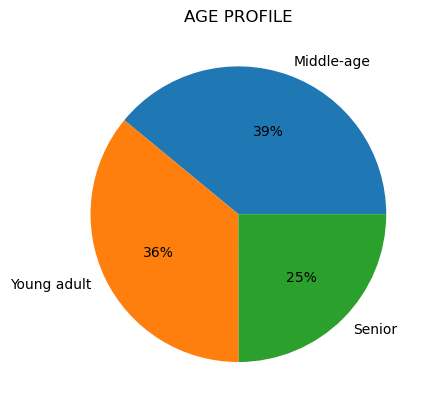

In [11]:
#create a pie chart of age variable
age_profile=df['age_flag'].value_counts().plot.pie(title='AGE PROFILE',label='',autopct=('%1.f%%'))

In [14]:
# exporting the viz
age_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_profile.png'))

In [15]:
pd.options.display.max_columns=None

In [17]:
df.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_last_orders,order_frequency_flag,_merge,age_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both,Middle-age
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both,Middle-age
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both,Middle-age
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both,Middle-age
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.99,Low spender,19.0,Regular customer,both,Middle-age


In [18]:
# age statistics
age_sums=df.groupby(['age_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum','max','mean']})

In [19]:
age_sums

days_since_last_order                        prices        \
                              min   max       mean          sum   max   
age_flag                                                                
Middle-age                    0.0  30.0  11.113621  98545095.95  25.0   
Senior                        0.0  30.0  11.080922  63034457.05  25.0   
Young adult                   0.0  30.0  11.109790  90860139.83  25.0   

                       
                 mean  
age_flag               
Middle-age   7.792152  
Senior       7.793480  
Young adult  7.785757

### Observation: Customers in all age group have an average of 11 days in between their orders.

In [21]:
# creating a crosstab between region and age
#create new region variable 
region = []

In [22]:
#for loop to fill region variable according to directions
for value in df['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [23]:
#insert region as column into df
df['region'] = region

In [25]:
# creating a crosstab between region and age
region_age=pd.crosstab(df['region'],df['age_flag'],dropna=False)

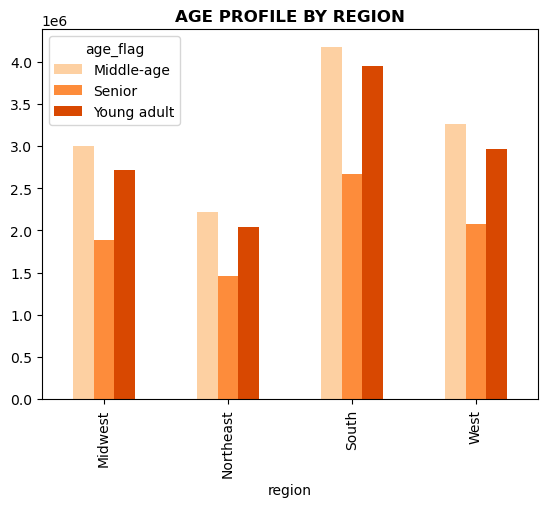

In [26]:
# create a bar chart between age and region
regions_age=region_age.plot.bar(color=sns.color_palette('Oranges',3))
plt.title('AGE PROFILE BY REGION',fontweight='bold')
plt.show()

In [27]:
# exporting the viz
regions_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_age.png'))

In [29]:
#import department dataframe
df_dep=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [30]:
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [31]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [32]:
#merging department data frame with df datadrame
df_final=df.merge(df_dep,on='department_id')

In [33]:
# creating a crosstab between department and age
department_age=pd.crosstab(df_final['department'],df_final['age_flag'],dropna=False)

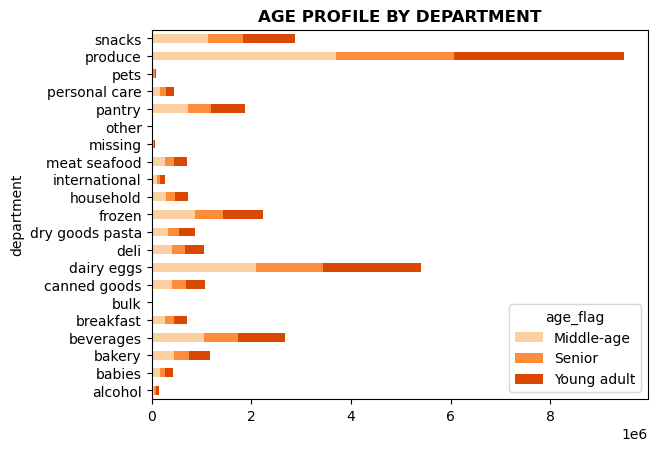

In [39]:
#creating a stacked bar chart of age and department
dept_age=department_age.plot.barh(stacked=True,color=sns.color_palette('Oranges',3))
plt.title('AGE PROFILE BY DEPARTMENT',fontweight='bold')
plt.show()

In [40]:
# exporting the viz
dept_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_age.png'))

#### Observation: The departments: produce, dairy and snacks are the top three departments across all three age groups.

### Income

In [38]:
# perform descriptive statistics for income variable
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

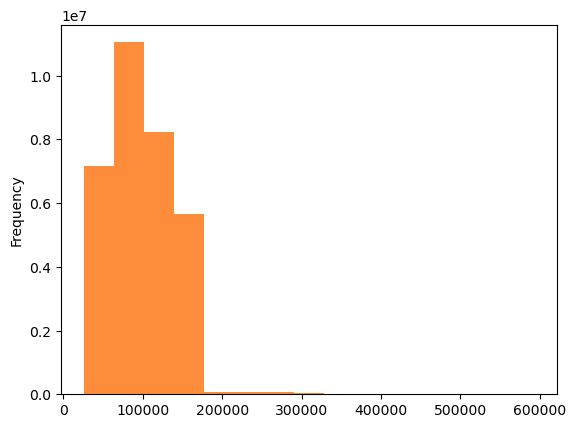

In [50]:
# create the histogram to understand the income distribution
hist_inc = df['income'].plot.hist(bins = 15, color=sns.color_palette('Oranges',1))

In [59]:
# create income_flag for income group classification : "Low-income" (<35k), "Moderate-income" (35-75k), "High-income" (75-180k), "Affluent-income" (>=180k)
df_final.loc[df_final['income'] < 35000, 'income_flag'] = 'Low-income'
df_final.loc[(df_final['income'] >= 35000) & (df_final['income'] < 75000), 'income_flag'] = 'Moderate-income'
df_final.loc[(df_final['income'] >= 75000) & (df_final['income'] < 180000), 'income_flag'] = 'High-income'
df_final.loc[df_final['income'] >= 180000, 'income_flag'] = 'Affluent-income'

In [60]:
# count the frequency for each income group category
df_final['income_flag'].value_counts(dropna = False)

High-income        21666253
Moderate-income     9482054
Low-income           960712
Affluent-income      295840
Name: income_flag, dtype: int64

In [61]:
# count the total frequency
df_final['income_flag'].value_counts().sum()

32404859

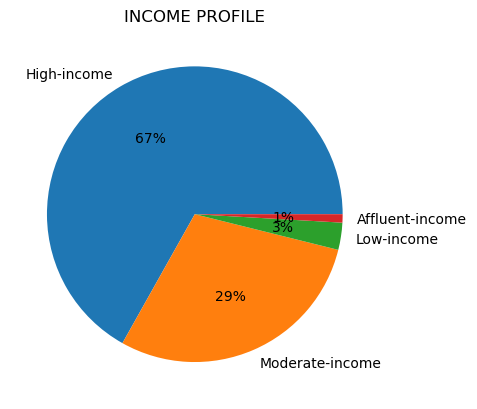

In [62]:
#create pie chart
income_profile=df_final['income_flag'].value_counts().plot.pie(title='INCOME PROFILE',label='',autopct=('%1.f%%'))

In [63]:
# exporting the viz
income_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_profile.png'))

#### Observation: High income i.e. 75-180k represent highest revenue for instacart. 

In [64]:
#creating crosstab between income and region
income_region=pd.crosstab(df_final['region'],df_final['income_flag'],dropna=False)

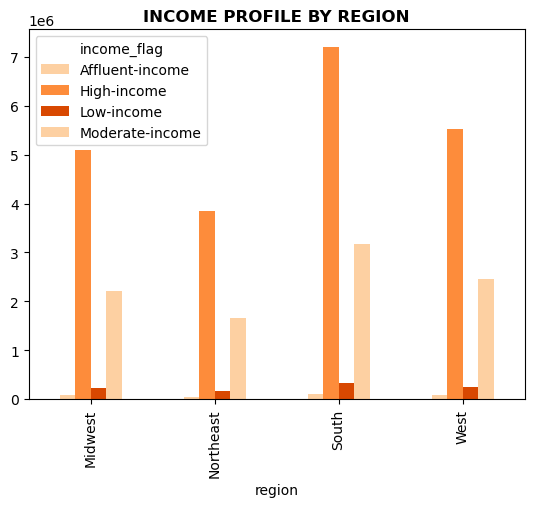

In [65]:
# creating bar chart
income_regions=income_region.plot.bar(color=sns.color_palette('Oranges',3))
plt.title('INCOME PROFILE BY REGION',fontweight='bold')
plt.show()

In [66]:
# exporting the viz
income_regions.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_regions.png'))

In [67]:
# creating crosstab between income and department
department_income=pd.crosstab(df_final['department'],df_final['income_flag'],dropna=False)

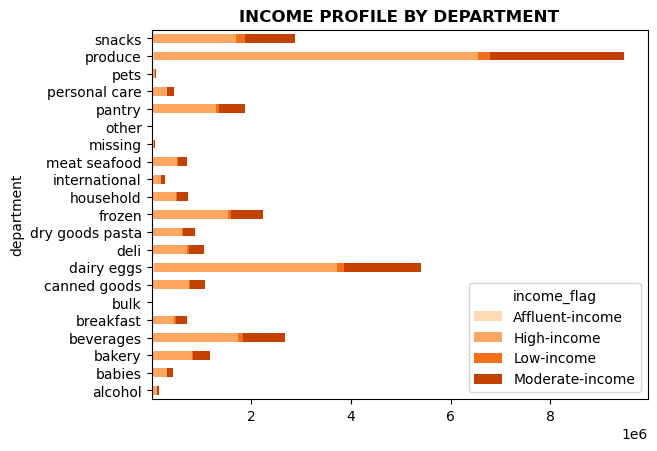

In [71]:
# creating stacked bar chart
dept_income=department_income.plot.barh(stacked=True,color=sns.color_palette('Oranges',4))
plt.title('INCOME PROFILE BY DEPARTMENT',fontweight='bold')
plt.show()  

In [72]:
# exporting the viz
dept_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependent_income.png'))

#### Oberservation: The departments: produce, dairy and snacks are the top three departments across all income groups.

### Dependents

In [76]:
# profiling based on dependents #create a crosstab between the "marital_status" and "n_dependants"
crosstab_ms_nde = pd.crosstab(df_final['fam_status'], df_final['n_dependants'], dropna = False)

In [77]:
# display crosstab
crosstab_ms_nde

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


In [79]:
# create status_flag for each customer: 
# label customer as "Single no dependants" where ('marital_status' in (divorced/widowed, living with parents and siblings, single)) & (n_dependants == 0)
df_final.loc[(df_final['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_final['n_dependants']==0), 'status_flag'] = 'Single no dependants'
# label customer as "Single with dependants" where ('marital_status' in (divorced/widowed, living with parents and siblings, single)) & (n_dependants >= 1)
df_final.loc[(df_final['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_final['n_dependants'] >=1), 'status_flag'] = 'Single with dependants'
# label customer as "Married no dependants" (assumption: 1 dependant is a spouse) where ('marital_status' == 'married') & (n_dependants == 1)
df_final.loc[(df_final['fam_status'] == 'married') & (df_final['n_dependants'] == 1), 'status_flag'] = 'Married no dependants'
# label customer as "Married with dependants" where ('marital_status' == 'married') & (n_dependants > 1)
df_final.loc[(df_final['fam_status'] == 'married') & (df_final['n_dependants'] > 1), 'status_flag'] = 'Married with dependants'

In [80]:
# count the frequency for each status_category
df_final['status_flag'].value_counts(dropna = False)

Married with dependants    15205849
Single no dependants        8097503
Married no dependants       7550904
Single with dependants      1550603
Name: status_flag, dtype: int64

In [81]:
# count the total frequency
df_final['status_flag'].value_counts().sum()

32404859

In [109]:
# marital_status statistics
df_final.groupby('status_flag').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                 prices  \
                                          max       mean  min    max   
status_flag                                                            
Married no dependants                    30.0  11.113141  0.0   25.0   
Married with dependants                  30.0  11.117681  0.0   25.0   
Single no dependants                     30.0  11.080805  0.0   25.0   
Single with dependants                   30.0  11.048170  0.0   25.0   

                                        
                             mean  min  
status_flag                             
Married no dependants    7.794911  1.0  
Married with dependants  7.787337  1.0  
Single no dependants     7.789227  1.0  
Single with dependants   7.800004  1.0

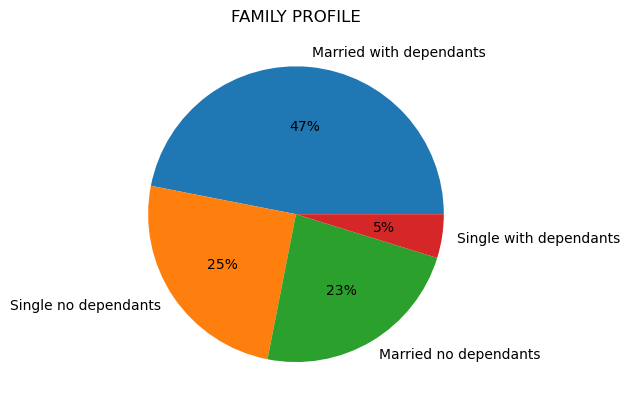

In [82]:
# creating a pie chart
family_profile=df_final['status_flag'].value_counts().plot.pie(title='FAMILY PROFILE',label='',autopct=('%1.f%%'))

In [83]:
# exporting the viz
family_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_profile.png'))

#### Observation: Married customers with family/dependants represent highest proprtion of customers and highest revenue for instacart closely followed by singles with no dependants.

In [85]:
# creating a crosstab between dependents and orders_day_of_week
orders_day_dependent=pd.crosstab(df_final['orders_day_of_week'],df_final['status_flag'],dropna=False)

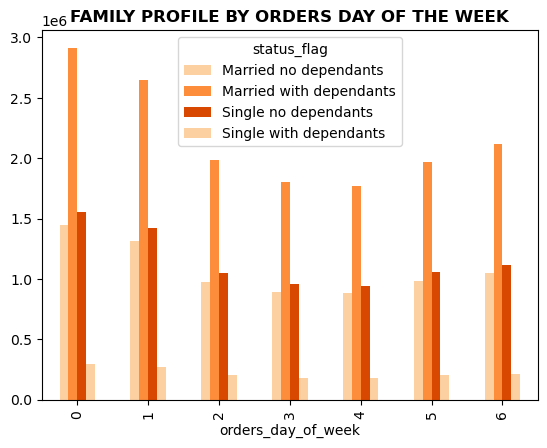

In [86]:
#creating bar chart
orders_day_dependent=orders_day_dependent.plot.bar(color=sns.color_palette('Oranges',3))
plt.title('FAMILY PROFILE BY ORDERS DAY OF THE WEEK',fontweight='bold')
plt.show()

In [95]:
# exporting the viz
orders_day_dependent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_day_dependents.png'))

#### Observation: There seems to be no differences between the family/single-groups in terms of which day they prefer to order. 

In [87]:
# creating a crosstab between dependents and order_hour_of_day
orders_hour_dependent=pd.crosstab(df_final['order_hour_of_day'],df_final['status_flag'],dropna=False)

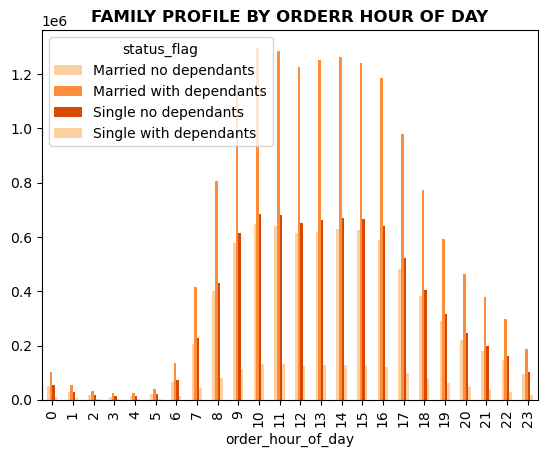

In [88]:
#creating bar chart
orders_hour_dependent=orders_hour_dependent.plot.bar(color=sns.color_palette('Oranges',3))
plt.title('FAMILY PROFILE BY ORDERR HOUR OF DAY',fontweight='bold')
plt.show()

In [94]:
# exporting the viz
orders_hour_dependent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_hour_dependents.png'))

#### Observation: There seems to be no differences between the family/single-groups in terms of which hour they prefer to order. 

In [89]:
# creating a crosstab between dependents and region
region_dependent=pd.crosstab(df_final['region'],df_final['status_flag'],dropna=False)

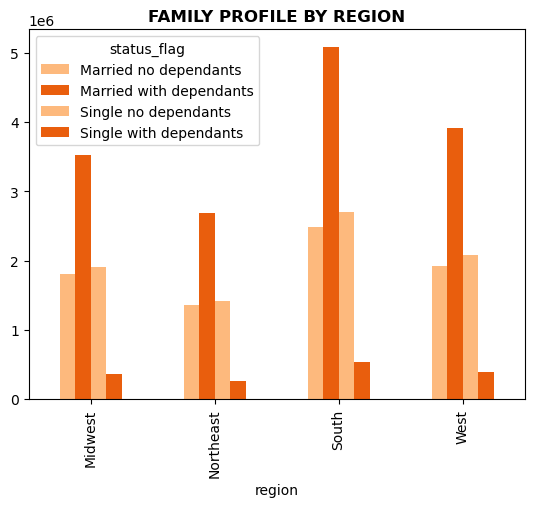

In [90]:
#creating bar chart
region_dependents=region_dependent.plot.bar(color=sns.color_palette('Oranges',2))
plt.title('FAMILY PROFILE BY REGION',fontweight='bold')
plt.show()

In [91]:
# exporting the viz
region_dependents.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_dependents.png'))

In [96]:
# creating a crosstab between dependent & department- normalized
crosstab_dept_depend_1=pd.crosstab(index=df_final['department'],columns=df_final['status_flag'],normalize='index')

In [97]:
# creating second crosstab to put labels on chart
crosstab_dept_depend_2=pd.crosstab(index=df_final['department'],columns=df_final['status_flag'])

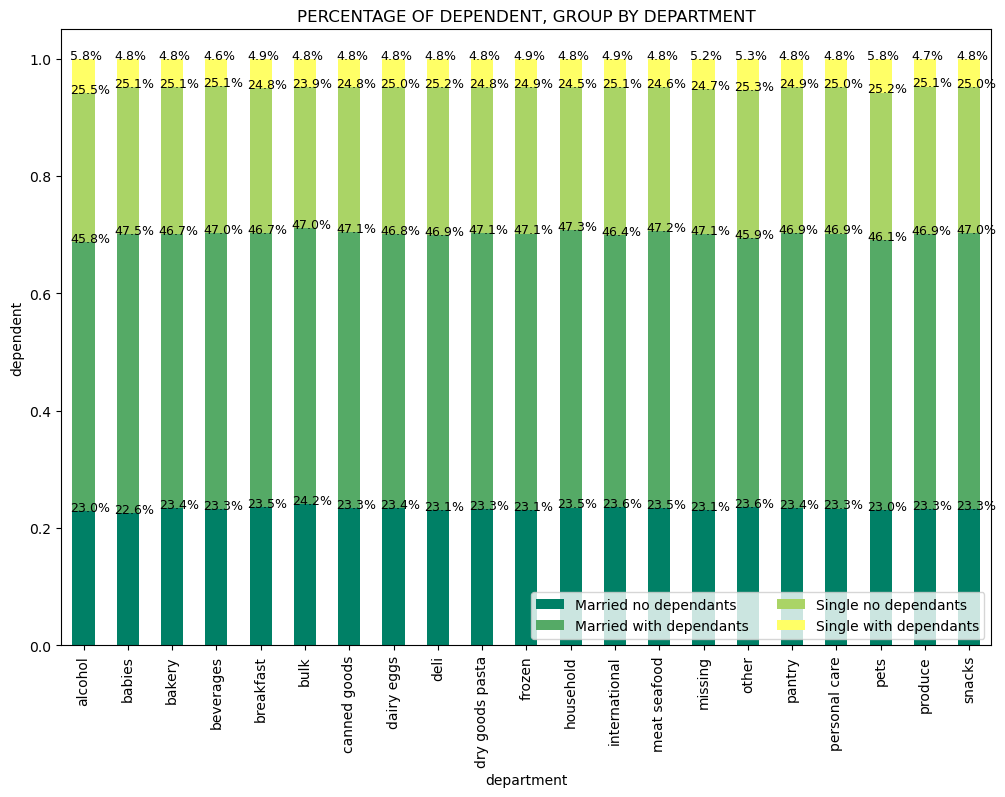

In [101]:
# normalize bar chart of dependent , group by department
stacked_dept_depend = crosstab_dept_depend_1.plot(kind='bar', stacked=True, colormap='summer', figsize=(12, 8))
plt.title('PERCENTAGE OF DEPENDENT, GROUP BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('dependent')

for n, x in enumerate([*crosstab_dept_depend_2.index.values]):
    for proportion, y_loc in zip(crosstab_dept_depend_1.loc[x], crosstab_dept_depend_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [102]:
# exporting the viz
stacked_dept_depend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_dependents.png'))

### 04. Summary: Aggregation Max, Mean, and Min Variables for Usage Frequency and Expenditure

### Segmentation by Age

In [113]:
age_sums

days_since_last_order                        prices        \
                              min   max       mean          sum   max   
age_flag                                                                
Middle-age                    0.0  30.0  11.113621  98545095.95  25.0   
Senior                        0.0  30.0  11.080922  63034457.05  25.0   
Young adult                   0.0  30.0  11.109790  90860139.83  25.0   

                       
                 mean  
age_flag               
Middle-age   7.792152  
Senior       7.793480  
Young adult  7.785757

#### Oberservation: The usage frequency and expenditure are similar across age groups, but middle-aged shoppers tend to shop a little more frequently while seniors tend to purchase slightly more expensive products.   

### Segmentation by Income

In [114]:
# income_profile statistics
df_final.groupby('income_flag').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                 prices               
                                  max       mean  min    max      mean  min
income_flag                                                                
Affluent-income                  30.0  10.241901  0.0   25.0  7.733438  1.0
High-income                      30.0  11.050546  0.0   25.0  7.962278  1.0
Low-income                       30.0  11.756873  0.0   25.0  6.492908  1.0
Moderate-income                  30.0  11.188672  0.0   25.0  7.530149  1.0

#### Observation: The low-income shoppers shops the least frequently and purchase slightly cheaper items. In terms of expenditure, high-income shopper spend slighly more than the afluent and moderate-income customers.


### Segmentation by dependents

In [115]:
df_final.groupby('status_flag').agg({'days_since_last_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_last_order                 prices  \
                                          max       mean  min    max   
status_flag                                                            
Married no dependants                    30.0  11.113141  0.0   25.0   
Married with dependants                  30.0  11.117681  0.0   25.0   
Single no dependants                     30.0  11.080805  0.0   25.0   
Single with dependants                   30.0  11.048170  0.0   25.0   

                                        
                             mean  min  
status_flag                             
Married no dependants    7.794911  1.0  
Married with dependants  7.787337  1.0  
Single no dependants     7.789227  1.0  
Single with dependants   7.800004  1.0

#### Observation: The married customers with dependants are the most frequent shoppers and purchase slightly cheaper items. Singles with dependants are the least frequent shoppers.

In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int64   
 1   sex                    object  
 2   state                  object  
 3   age                    int64   
 4   date_joined            object  
 5   n_dependants           int64   
 6   fam_status             object  
 7   income                 int64   
 8   order_id               int64   
 9   order_number           int64   
 10  orders_day_of_week     int64   
 11  order_hour_of_day      int64   
 12  days_since_last_order  float64 
 13  product_id             int64   
 14  add_to_cart_order      int64   
 15  reordered              int64   
 16  product_name           object  
 17  aisle_id               int64   
 18  department_id          int64   
 19  prices                 float64 
 20  price_range_loc        object  
 21  busiest day            object

In [104]:
## exporting the data
df_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_final.pkl'))